# Reducción de dimensión supervisada: Análisis Lineal Discriminante (LDA)

Linear Discriminant Analysis (LDA) es una técnica de extracción de características
que puede usarse para incrementar la eficiencia computacional y reducir los sobreajustes. For-
mulado inicialmente por Ronald A. Fischer (https://bit.ly/3f9e6KF) en 1936 con el conjunto de
datos de flores iris para problemas de clasificación de dos clases. En 1948 C. Radhakrishna Rao
(https://bit.ly/2VX3Hub) lo generalizó para problemas multiclase bajo el supuesto de covarianzas
de clase iguales y clases con distribuciones normales.
En general, los conceptos detrás de LDA son muy similares a PCA: mientras PCA busca las
componentes ortogonales de varianza mínima, el objetivo de LDA es encontrar un subespacio de
características que optimice la separabilidad de clases.
El algoritmo se compone de los siguientes pasos:

<img src="./img/algorithms/LDA.png" alt="drawing" width="70%"/>

Con LDA Y PCA es necesario estandarizar nuestro datos, porque si no se van a sesgar nuestro datos, porque en ambos utilizamos **matrices que nos dicen que tan dispersas son las variables**

## LDA con scikit-learn

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Obtencion de los datos

In [6]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                     header=None)
df_wine.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [8]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


### Estandarización (Preprocesamiento)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Reducción LDA

El `X_train_lda` ya es nadama de $2$ componenetes, ya se hizo todo el trabajo en `fit` de entrenamiento, y ese entrenameinto hace el algortimo mencionado y nos regresa una matriz de proyeccción para nuestro conjunto.

*Vamos proyectar un conjunto de $13$ caracteristicas a un conjunto de $2$*

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
# Como este si es supervisado, debemos indicar la y_train
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

### Clasificador Regresición logistica

Ya entrenamos nuestro modelo con lda, ya obtuvimos nuestras $2$ caracteristicas `X_train_lda` y ahora usaremos una regresión logisca para clasificar.


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# Aqui entramos nuesto clasificador
lr.fit(X_train_lda, y_train)

LogisticRegression()

### Visualización de datos de entrenamiento

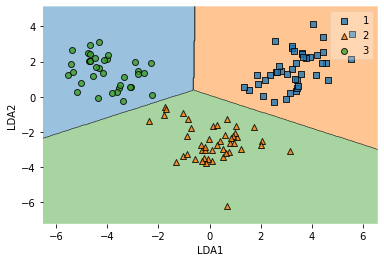

In [20]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train_lda, y_train, clf=lr)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.show()

`clr=clasificador`, si el clasificador no esta entrenado, nos mandará un error, deben de entrenar ese clasificador antes de ponerlo ahi.

### Visualizacion con datos de prueba

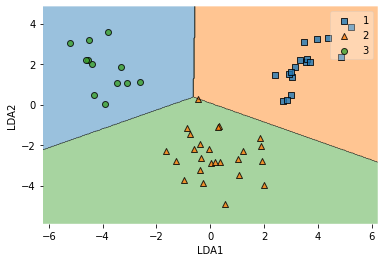

In [21]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test_lda, y_test, clf=lr)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.show()

PCA solo encuentra aquellas que sean las principales, en cambio LDA hace transformaciones con las matrices de dispersión que nos lleva a otro espacio, en el cual se optimize la separabilidad de clases, y vemos que si funciona mejor LDA, a pesar, que elegimos $2$ componentes.

El problema de LDA es que es totalmente supervisado, necesitamos saber las salidas para entrenarlo, en cambio, PCA no, podriamos trabajar con conjuntos que no tengamos las salidas y aun asi podremos trabajar con el.


**Notas**

- fit: Lo que hace es ajustar (aprendizaje a si mismo), aplicar el algoritmo dado, obtiene lo que tenga que obtener.

- transform: Aplica una transformacion, pasar un conjunto a otro, dependiento del algortimo invocado.

In [ ]:
# Tarea moral: Hacer la matriz de dispersion, la cual
# es la que se ocupa para este algoritmo, es vez de la matriz
# de covarianza que se utiliza para PCA.